# Unidad 4 - Aprendizaje Supervisado: Competencia Kaggle

Costamagna Marcelo 

Angelina

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.svm import SVC

from sklearn import metrics

import lightgbm as lgm

np.random.seed(1234)  # Para mayor determinismo

%matplotlib inline

Data Fields

    PetID - Unique hash ID of pet profile
    AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
    Type - Type of animal (1 = Dog, 2 = Cat)
    Name - Name of pet (Empty if not named)
    Age - Age of pet when listed, in months
    Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
    Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
    Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
    Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
    Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
    Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
    MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
    FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
    Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
    Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
    Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
    Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
    Quantity - Number of pets represented in profile
    Fee - Adoption fee (0 = Free)
    State - State location in Malaysia (Refer to StateLabels dictionary)
    RescuerID - Unique hash ID of rescuer
    VideoAmt - Total uploaded videos for this pet
    PhotoAmt - Total uploaded photos for this pet
    Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.



Cargamos los datasets:

In [41]:
data_train = pd.read_csv("./Data/train_git.csv")
data_test = pd.read_csv("./Data/test_git.csv")
data_sample_submission  = pd.read_csv("./Data/submission_git.csv")


# Modelo por defecto sin cambiar hiperparámetros, escalar variables o utilizar one hot encoding.

Seleccionamos las columnas de interés del set de etrenamiento:

In [4]:
df_train = pd.concat( [data_train[['Type',
                    'Age',
                    'Breed1',
                    'Breed2',
                    'Gender',
                    'Color1',
                    'Color2',
                    'Color3',
                    'MaturitySize',
                   'FurLength',
                    'Vaccinated',
                   'Dewormed',
                   'Sterilized',
                   'Health',
                   'Quantity',
                   'Fee',
                   'State']],
                   data_train[['AdoptionSpeed']] ] , axis=1 )



In [5]:
df_train.dtypes

Type             int64
Age              int64
Breed1           int64
Breed2           int64
Gender           int64
Color1           int64
Color2           int64
Color3           int64
MaturitySize     int64
FurLength        int64
Vaccinated       int64
Dewormed         int64
Sterilized       int64
Health           int64
Quantity         int64
Fee              int64
State            int64
AdoptionSpeed    int64
dtype: object

Cambiamos el tipo de dato a categórico para las variables que corresponda:

In [6]:
df_train['Type'] = pd.Categorical(df_train['Type'])
df_train['Breed1'] = pd.Categorical(df_train['Breed1'])
df_train['Breed2'] = pd.Categorical(df_train['Breed2'])
df_train['Gender'] = pd.Categorical(df_train['Gender'])
df_train['Color1'] = pd.Categorical(df_train['Color1'])
df_train['Color2'] = pd.Categorical(df_train['Color2'])
df_train['Color3'] = pd.Categorical(df_train['Color3'])
df_train['MaturitySize'] = pd.Categorical(df_train['MaturitySize'])
df_train['FurLength'] = pd.Categorical(df_train['FurLength'])
df_train['Vaccinated'] = pd.Categorical(df_train['Vaccinated'])
df_train['Dewormed'] = pd.Categorical(df_train['Dewormed'])
df_train['Sterilized'] = pd.Categorical(df_train['Sterilized'])
df_train['Health'] = pd.Categorical(df_train['Health'])
df_train['State'] = pd.Categorical(df_train['State'])
#df_train['colores'] = pd.Categorical(df_train['colores'])
#df_train['edad'] = pd.Categorical(df_train['edad'])
df_train['AdoptionSpeed'] = pd.Categorical(df_train['AdoptionSpeed'])

Separamos el dataset en train y test:

In [270]:
#random.seed(1234)

# División entre instancias y etiquetas
X, y = df_train.iloc[:, :17], df_train.AdoptionSpeed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    

In [12]:
X.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State'],
      dtype='object')

Probamos con un modelo de regresión lineal:

In [13]:
modelo_svm = SVC(gamma='auto')
modelo_svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_true, y_pred = y_test, modelo_svm.predict(X_test)
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.25      0.02      0.03        55
           1       0.34      0.23      0.27       426
           2       0.34      0.34      0.34       572
           3       0.27      0.13      0.17       462
           4       0.39      0.66      0.49       602

    accuracy                           0.35      2117
   macro avg       0.32      0.28      0.26      2117
weighted avg       0.33      0.35      0.32      2117



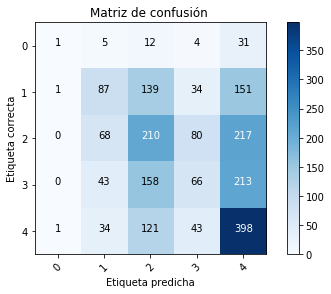

In [466]:
plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=['0', '1','2','3', '4'], title="Matriz de confusión " )

In [37]:
print('The rmse of prediction is:', metrics.mean_squared_error(y_true, y_pred) ** 0.5)

The rmse of prediction is: 1.5004329401976721


Utilizando un modelo de SVM básico obtuvimos un **Accuracy** de 0.35 sobre test de validación ahora corramos el modelo sobre test:

Preparamos los datos con los mismos tipos que train:

In [9]:
df_test = data_test[['Type',
                    'Age',
                    'Breed1',
                    'Breed2',
                    'Gender',
                    'Color1',
                    'Color2',
                    'Color3',
                    'MaturitySize',
                   'FurLength',
                    'Vaccinated',
                   'Dewormed',
                   'Sterilized',
                   'Health',
                   'Quantity',
                   'Fee',
                   'State']]

In [10]:
df_test['Type'] = pd.Categorical(df_test['Type'])
df_test['Breed1'] = pd.Categorical(df_test['Breed1'])
df_test['Breed2'] = pd.Categorical(df_test['Breed2'])
df_test['Gender'] = pd.Categorical(df_test['Gender'])
df_test['Color1'] = pd.Categorical(df_test['Color1'])
df_test['Color2'] = pd.Categorical(df_test['Color2'])
df_test['Color3'] = pd.Categorical(df_test['Color3'])
df_test['MaturitySize'] = pd.Categorical(df_test['MaturitySize'])
df_test['FurLength'] = pd.Categorical(df_test['FurLength'])
df_test['Vaccinated'] = pd.Categorical(df_test['Vaccinated'])
df_test['Dewormed'] = pd.Categorical(df_test['Dewormed'])
df_test['Sterilized'] = pd.Categorical(df_test['Sterilized'])
df_test['Health'] = pd.Categorical(df_test['Health'])
df_test['State'] = pd.Categorical(df_test['State'])

C:\Users\marceluss\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marceluss\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marceluss\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Corremos el modelo sobre test:

In [78]:
y_pred_test =  modelo_svm.predict(df_test)

Reemplazamos la columna a predecir **Adoption Speed** del dataset de sumbmission por el vector de valores predichos y guardamos el CSV.

In [79]:
data_sample_submission['AdoptionSpeed'] = y_pred_test

In [80]:
data_sample_submission.head()

,PID,AdoptionSpeed
0,1,1
1,2,2
2,7,2
3,9,4
4,11,1


Guardamos el dataset para enviar a Kaggle

In [81]:
data_sample_submission.to_csv('./Data/sample_submission_30_7_1.csv', index=False)

# Probamos  algoritmo LGBM

In [271]:
train_data = lgm.Dataset(X_train, y_train)
test_data = lgm.Dataset(X_test, y_test, reference=train_data)

In [272]:
params = {'objective': 'multiclass',
    'num_class':5,
    'metric': 'multi_logloss',
     "num_leaves" : 60,
          "max_depth": -1,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1    
         }

# train
#modelo_lgm = lgm.train(params,
#                train_data,
#                num_boost_round=20,
#                valid_sets=test_data,
#                early_stopping_rounds=5
#                      )

modelo_lgm = lgm.train(params, train_data, 2000,
          valid_sets=[train_data, test_data],
          early_stopping_rounds=100, verbose_eval=200)
          

C:\Users\marceluss\Anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[37]	training's multi_logloss: 1.10628	valid_1's multi_logloss: 1.35503


In [273]:


y_true, y_pred_arg_mx = y_test, modelo_lgm.predict(X_test)


In [274]:
y_pred = np.argmax(y_pred_arg_mx, axis=1)


In [275]:
print('The rmse of prediction is:', metrics.mean_squared_error(y_true, y_pred) ** 0.5)
#best 1.3401 1.33

The rmse of prediction is: 1.323797924489191


In [276]:
y_pred_test_arg_max =  modelo_lgm.predict(df_test)

In [277]:
data_sample_submission['AdoptionSpeed'] = np.argmax(y_pred_test_arg_max, axis=1)

In [278]:
data_sample_submission.head()

,PID,AdoptionSpeed
0,1,2
1,2,1
2,7,2
3,9,4
4,11,2


Guardamos el dataset para enviar a Kaggle

In [279]:
data_sample_submission.to_csv('./Data/sample_submission_02_08_2.csv', index=False)

El submit de Kaggle dio un resultado de 0.38 !!!!!!!!!

# Modelo utilizando escalamiento y one hot encoding

1)Crear columna binaria  para cuando tiene doble **breed**

2)Crear columna binaria para cuando **Fee** es distinta de 0.

3)Escalamos columna **Fee y Age**.

4)Crear one hot para **Type, Gender, MaturitySize, FurLength, Vaccinated, Dewormes, Sterelized, Health**


In [23]:
#Copia del dataset
df_train_fe = df_train.copy()
df_test_fe = df_test.copy()


Crear columna binaria para cuando tiene doble **Breed**

In [24]:
df_train_fe['Breed2'] = np.where(  ( df_train_fe['Breed1'].astype(int) == df_train_fe['Breed2'].astype(int) ), 0, df_train_fe['Breed2'])    
df_test_fe['Breed2'] = np.where(  ( df_test_fe['Breed1'].astype(int) == df_test_fe['Breed2'].astype(int) ), 0, df_test_fe['Breed2'])    


df_train_fe['dbl_breed'] = np.where(  ( df_train_fe.Breed1.astype(int) > 0) &  (df_train_fe.Breed2.astype(int) > 0), 1, 0)
df_test_fe['dbl_breed'] = np.where(  ( df_test_fe.Breed1.astype(int) > 0) &  (df_test_fe.Breed2.astype(int) > 0), 1, 0)
df_train_fe['dbl_breed'] = pd.Categorical(df_train_fe['dbl_breed'])
df_test_fe['dbl_breed'] = pd.Categorical(df_test_fe['dbl_breed'])

2) Crear columna binaria para cuando **Fee** es distinta de 0.

In [25]:
df_train_fe['has_fee'] = np.where((df_train_fe.Fee > 0), 1, 0)
df_test_fe['has_fee'] = np.where((df_test_fe.Fee > 0), 1, 0)

3) Escalamos la columna **Fee y Age**.

In [26]:
scaler = MinMaxScaler()
df_train_fe[['Fee', 'Age']] = scaler.fit_transform(df_train_fe[['Fee','Age']])
df_test_fe[['Fee', 'Age']] = scaler.fit_transform(df_test_fe[['Fee','Age']])

4) Crear one hot para **Type, Gender, MaturitySize, FurLength, Vaccinated, Dewormed, Sterilized, Health**

In [27]:
dfDummies_t = pd.get_dummies(df_train_fe['Type'], prefix = 'Type')
dfDummies_g = pd.get_dummies(df_train_fe['Gender'], prefix = 'Gender')
dfDummies_m = pd.get_dummies(df_train_fe['MaturitySize'], prefix = 'MaturitySize')
dfDummies_f = pd.get_dummies(df_train_fe['FurLength'], prefix = 'FurLength') 
dfDummies_v = pd.get_dummies(df_train_fe['Vaccinated'], prefix = 'Vaccinated')
dfDummies_d = pd.get_dummies(df_train_fe['Dewormed'], prefix = 'Dewormed')
dfDummies_s = pd.get_dummies(df_train_fe['Sterilized'], prefix = 'Sterilized')
dfDummies_h = pd.get_dummies(df_train_fe['Health'], prefix = 'Health')

dfDummies_t_2 = pd.get_dummies(df_test_fe['Type'], prefix = 'Type')
dfDummies_g_2 = pd.get_dummies(df_test_fe['Gender'], prefix = 'Gender')
dfDummies_m_2 = pd.get_dummies(df_test_fe['MaturitySize'], prefix = 'MaturitySize')
dfDummies_f_2 = pd.get_dummies(df_test_fe['FurLength'], prefix = 'FurLength') 
dfDummies_v_2 = pd.get_dummies(df_test_fe['Vaccinated'], prefix = 'Vaccinated')
dfDummies_d_2 = pd.get_dummies(df_test_fe['Dewormed'], prefix = 'Dewormed')
dfDummies_s_2 = pd.get_dummies(df_test_fe['Sterilized'], prefix = 'Sterilized')
dfDummies_h_2 = pd.get_dummies(df_test_fe['Health'], prefix = 'Health')


Concatenamos los dataframes:

In [28]:
df_ml_train = pd.concat( [df_train_fe[['Age',
                                 'Breed1',
                                 'Breed2',
                                 'Color1',
                                 'Color2',
                                 'Color3',
                                 'Quantity',
                                 'Fee',
                                 'State']],
                    dfDummies_t,
                    dfDummies_g,
                    dfDummies_m, 
                    dfDummies_f, 
                    dfDummies_v,
                    dfDummies_d,
                    dfDummies_s,
                    dfDummies_h,
                    df_train_fe[['AdoptionSpeed']]], axis = 1)

df_ml_test = pd.concat( [df_test_fe[['Age',
                                 'Breed1',
                                 'Breed2',
                                 'Color1',
                                 'Color2',
                                 'Color3',
                                 'Quantity',
                                 'Fee',
                                 'State']],
                    dfDummies_t_2,
                    dfDummies_g_2,
                    dfDummies_m_2, 
                    dfDummies_f_2, 
                    dfDummies_v_2,
                    dfDummies_d_2,
                    dfDummies_s_2,
                    dfDummies_h_2,], axis = 1)

In [29]:
df_ml_test.columns

Index(['Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Quantity',
       'Fee', 'State', 'Type_1', 'Type_2', 'Gender_1', 'Gender_2', 'Gender_3',
       'MaturitySize_1', 'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4',
       'FurLength_1', 'FurLength_2', 'FurLength_3', 'Vaccinated_1',
       'Vaccinated_2', 'Vaccinated_3', 'Dewormed_1', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_1', 'Sterilized_2', 'Sterilized_3',
       'Health_1', 'Health_2', 'Health_3'],
      dtype='object')

In [30]:
df_ml_train.columns

Index(['Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Quantity',
       'Fee', 'State', 'Type_1', 'Type_2', 'Gender_1', 'Gender_2', 'Gender_3',
       'MaturitySize_1', 'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4',
       'FurLength_1', 'FurLength_2', 'FurLength_3', 'Vaccinated_1',
       'Vaccinated_2', 'Vaccinated_3', 'Dewormed_1', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_1', 'Sterilized_2', 'Sterilized_3',
       'Health_1', 'Health_2', 'Health_3', 'AdoptionSpeed'],
      dtype='object')

Entrenamos el modelo con el dataframe nuevo:

In [31]:
# División entre instancias y etiquetas
X_fe, y_fe = df_ml_train.iloc[:, :33], df_ml_train.AdoptionSpeed
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.30, stratify=y_fe)

In [32]:
X_fe.columns

Index(['Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Quantity',
       'Fee', 'State', 'Type_1', 'Type_2', 'Gender_1', 'Gender_2', 'Gender_3',
       'MaturitySize_1', 'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4',
       'FurLength_1', 'FurLength_2', 'FurLength_3', 'Vaccinated_1',
       'Vaccinated_2', 'Vaccinated_3', 'Dewormed_1', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_1', 'Sterilized_2', 'Sterilized_3',
       'Health_1', 'Health_2', 'Health_3'],
      dtype='object')

Utilizamos lightgmb, preparamos la estructura de datos y entrenamos:

In [34]:

train_data_fe = lgm.Dataset(X_train_fe, y_train_fe)
test_data_fe = lgm.Dataset(X_test_fe, y_test_fe, reference=train_data_fe)

In [49]:
params = {'objective': 'multiclass',
    'num_class':5,
    'metric': 'multi_logloss',
          #'metric':'multiclassova',
          #'is_unbalance': 'true',
          "learning_rate" : 0.001,
     "num_leaves" : 60,
          "max_depth": -1,
          "bagging_fraction" : 0.7,  # subsample
          "feature_fraction" : 0.7,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1    
         }

modelo_lgm = lgm.train(params, train_data_fe, 10000,
          valid_sets=[train_data_fe, test_data_fe],
          early_stopping_rounds=5000, verbose_eval=1000)

Training until validation scores don't improve for 5000 rounds.
[1000]	training's multi_logloss: 1.32166	valid_1's multi_logloss: 1.39313
[2000]	training's multi_logloss: 1.23428	valid_1's multi_logloss: 1.36667
[3000]	training's multi_logloss: 1.16949	valid_1's multi_logloss: 1.35697
[4000]	training's multi_logloss: 1.11657	valid_1's multi_logloss: 1.35428
[5000]	training's multi_logloss: 1.07094	valid_1's multi_logloss: 1.35488
[6000]	training's multi_logloss: 1.03025	valid_1's multi_logloss: 1.35781
[7000]	training's multi_logloss: 0.993475	valid_1's multi_logloss: 1.36146
[8000]	training's multi_logloss: 0.959658	valid_1's multi_logloss: 1.36623
[9000]	training's multi_logloss: 0.928586	valid_1's multi_logloss: 1.37133
Early stopping, best iteration is:
[4340]	training's multi_logloss: 1.10046	valid_1's multi_logloss: 1.35412


Predecimos, obtenemos el índice donde está el valor con mayor probabilidad (lgbm devuelve vector de probabilidades por cada categoría), asignamos a una variable y computamos la métrica R2:

In [50]:
y_true_fe, y_pred_arg_mx_fe = y_test_fe, modelo_lgm.predict(X_test_fe)

y_pred_fe = np.argmax(y_pred_arg_mx_fe, axis=1)

print('The rmse of prediction is:', metrics.mean_squared_error(y_true_fe, y_pred_fe) ** 0.5)

The rmse of prediction is: 1.3694070215064553


Predecimos sobre test y asignamos el valor predicho al dataframe:

In [45]:
y_pred_test_fe =  modelo_lgm.predict(df_ml_test)

In [47]:
data_sample_submission['AdoptionSpeed'] = np.argmax(y_pred_test_fe, axis=1)

In [48]:
data_sample_submission.head()

,PID,AdoptionSpeed
0,1,1
1,2,2
2,7,2
3,9,4
4,11,1


Guardasmo el CSV con los resultados:

In [ ]:
data_sample_submission.to_csv('./Data/sample_submission_02_08_5.csv', index=False)

Utilizando hot encoding obtuvimos valores por debajo (0.36) de los obtenidos sin realizar feature (0.38) engineering por lo cual preferimos el modelo anterior.